In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#Upload dataset
data = pd.read_csv("Salary_Data.csv")
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


<h2>Exploratory Data Analysis (EDA)</h2>

In [62]:
#Cek struktur data
print("Shape:", data.shape)
print("\nInfo:")

data.info()

Shape: (6704, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [63]:
#Cek Ringkasan Statistik
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [64]:
#Cek missing value:
data.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Visualisasi</h2>

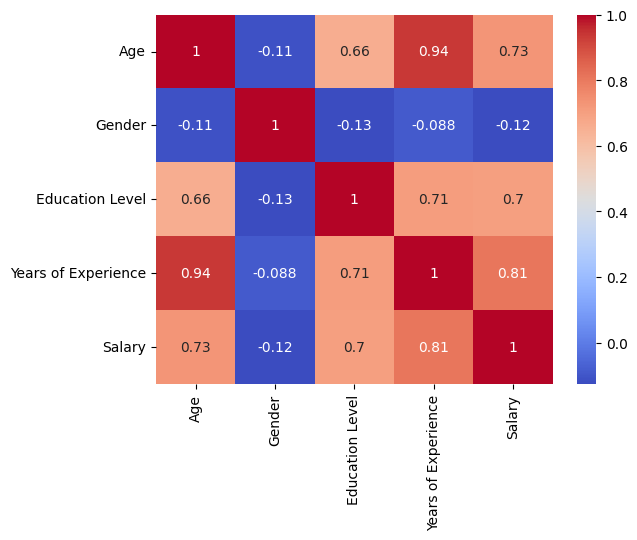

In [69]:
# Ambil kolom numerik saja
df_numeric = data.select_dtypes(include=['int64', 'float64'])
selected_cols = ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Salary']
df_small = data[selected_cols]

sns.heatmap(df_small.corr(), annot=True, cmap='coolwarm')
plt.show()

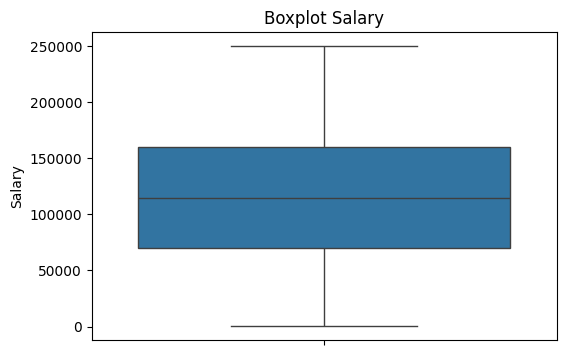

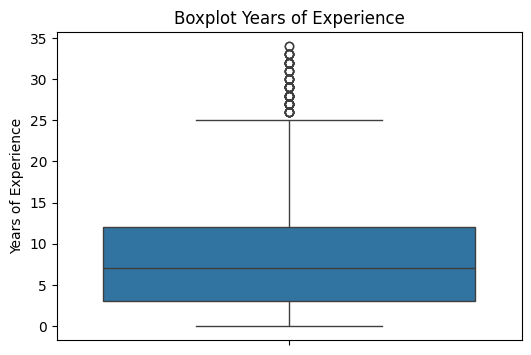

In [70]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Salary'])
plt.title("Boxplot Salary")
plt.ylabel("Salary")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(y=data['Years of Experience'])
plt.title("Boxplot Years of Experience")
plt.ylabel("Years of Experience")
plt.show()


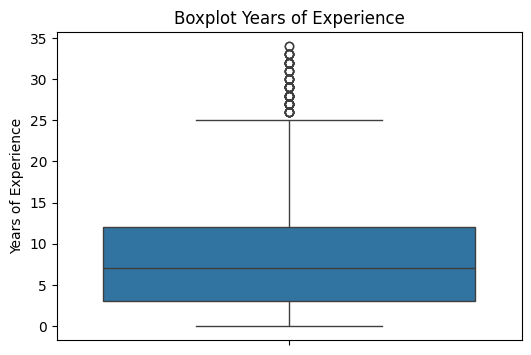

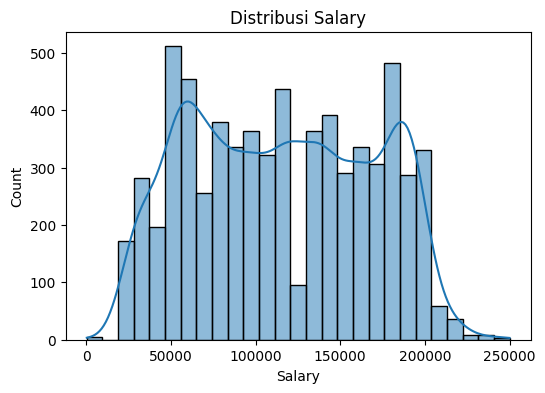

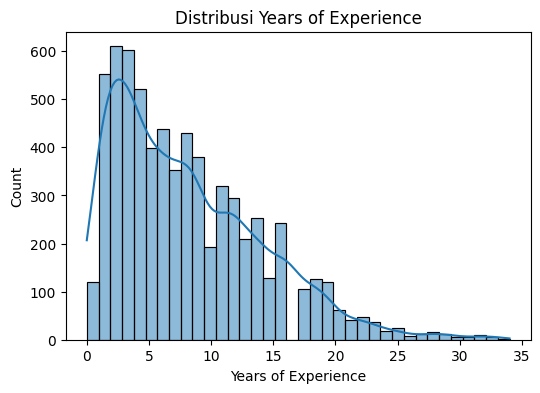

In [71]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Years of Experience'])
plt.title("Boxplot Years of Experience")
plt.ylabel("Years of Experience")
plt.show()
#Distribusy  Salary
plt.figure(figsize=(6,4))
sns.histplot(data['Salary'], kde=True)
plt.title("Distribusi Salary")
plt.show()

#Distribusi Years of Experience
plt.figure(figsize=(6,4))
sns.histplot(data['Years of Experience'], kde=True)
plt.title("Distribusi Years of Experience")
plt.show()

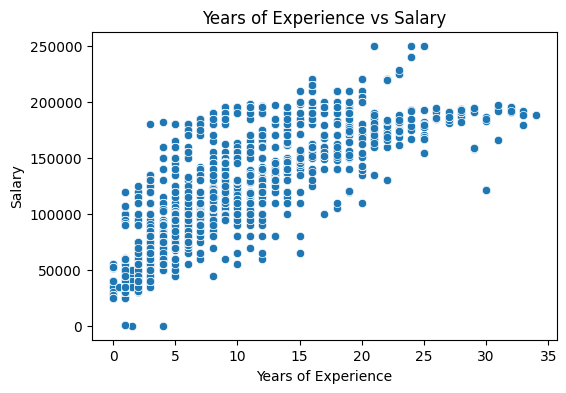

In [72]:
#Hubungan antara experience dan Salary
plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Years of Experience'], y=data['Salary'])
plt.title("Years of Experience vs Salary")
plt.show()



<h1>-- Preprocessing --</h1>



<h2>Cleaning</h2>

In [67]:

# Isi missing value untuk kolom numerik dengan mean
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

# Isi missing value untuk kolom kategori dengan modus
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

#Hapus baris jika masih ada missing value tersisa
data = data.dropna()

print("Total missing value setelah preprocessing:")
data.isnull().sum()


Total missing value setelah preprocessing:


,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [68]:


education_mapping = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}
data['Education Level'] = data['Education Level'].map(education_mapping)

gender_mapping = {
    "Male": 0,
    "Female": 1,
    "Other":2
}
data['Gender'] = data['Gender'].map(gender_mapping)
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,0,2.0,Software Engineer,5.0,90000.0
1,28.0,1,3.0,Data Analyst,3.0,65000.0
2,45.0,0,4.0,Senior Manager,15.0,150000.0
3,36.0,1,2.0,Sales Associate,7.0,60000.0
4,52.0,0,3.0,Director,20.0,200000.0


<h3>Train-test Split dan Normalisasi</h3>


In [80]:

#Evaluasi Model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Evaluasi Model ---")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R-Squared (R²): ({r2:.4f})")       # Semakin mendekati 1 semakin bagus

--- Evaluasi Model ---
MSE  : 333571947.9884
RMSE : 18263.9521
R-Squared (R²): (0.8751)


--- Evaluasi Model ---
MSE  : 81196388.1508
RMSE : 9010.9038
R² Score: 0.9695972214429406


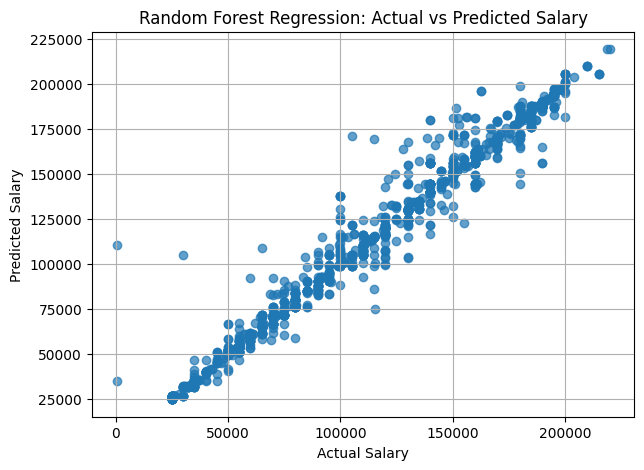

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = data[['Years of Experience', 'Education Level', 'Job Title']]
y = data['Salary']

numeric_features = ['Years of Experience']
categorical_features = ['Education Level', 'Job Title']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

X_processed = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# Model Random Forest
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("--- Evaluasi Model ---")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print("R² Score:", r2)

#Scatterlot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Random Forest Regression: Actual vs Predicted Salary")
plt.grid(True)
plt.show()
